# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete &mdash; there are 52 rows excluding the header, which consist of data for the 50 states, District of Columbia, and the country as a whole ("All"); there is no missing number in the "Rate", "Verbal", or "Math" column.  
  
The last few numbers in the "Rate" column seem extremely low; other than that, there are no obvious issues with the observations.

##### 3. Describe in words what each variable(column) is.

The `"State"` column contains the two-letter abbreviations of all 50 states plus District of Columbia ("DC"), and "All" representing the entire US.  
The `"Rate"` column is the corresponding participation rate for each of the region in the "State" column.  
The `"Verbal"` column is the corresponding mean SAT verbal score for each of the region.  
The `"Math"` column is the corresponding mean SAT math score for each of the region.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import csv

data = []
with open("../data/sat_scores.csv", "rU") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

##### 5. Print the data

In [2]:
for row in data:
    print(row)

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', '550']
['WY', '11', '547',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [3]:
header = data.pop(0)

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [4]:
states = [row[0] for row in data]

##### 8. Print the types of each column

In [5]:
# check the types of each of the elements in the first row
for element in data[0]:
    print(type(element))

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [6]:
# columns 1-3 need to be reassigned to float
for row in data:
    for i in range(1,4):
        row[i] = float(row[i])

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [7]:
# rate values are in column 1
rate = {row[0]: row[1] for row in data}

# verbal values are in column 2
verbal = {row[0]: row[2] for row in data}

# math values are in column 3
math = {row[0]: row[3] for row in data}

##### 11. Create a dictionary with the values for each of the numeric columns

In [8]:
# numeric columns are columns 1-3
sat_data = {column: [row[i+1] for row in data] 
            for i, column in enumerate(header[1:])}

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [9]:
def max_min(column):
    """take in a column name (string) and print out the min and max of the column"""
    print('{} min: {}; max: {}'.format(column, min(sat_data[column]), max(sat_data[column])))
    
max_min('Rate')
max_min('Verbal')
max_min('Math')

Rate min: 4.0; max: 82.0
Verbal min: 482.0; max: 593.0
Math min: 439.0; max: 603.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [10]:
def std_dev(data):
    mean = sum(data) / len(data) 
    squares = [(num - mean) ** 2 for num in data]
    return (sum(squares)/len(data)) ** 0.5

In [11]:
# standard deviation of the "Rate" column
print(std_dev(sat_data['Rate']))

27.0379964945


In [12]:
# standard deviation of the "Verbal" column
print(std_dev(sat_data['Verbal']))

32.9150949616


In [13]:
# standard deviation of the "Math" column
print(std_dev(sat_data['Math']))

35.6669961643


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

In [15]:
# remove data from the "All" row
for key, value in sat_data.items():
    sat_data[key] = value[:-1]

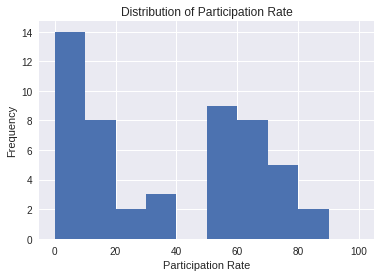

In [16]:
plt.hist(sat_data['Rate'], bins=range(0, 101, 10))
plt.xlabel('Participation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Participation Rate');

##### 15. Plot the Math(s) distribution

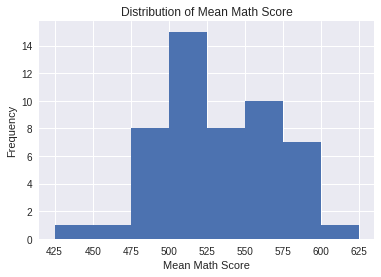

In [17]:
plt.hist(sat_data['Math'], bins=range(425, 626, 25))
plt.xlabel('Mean Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Math Score');

##### 16. Plot the Verbal distribution

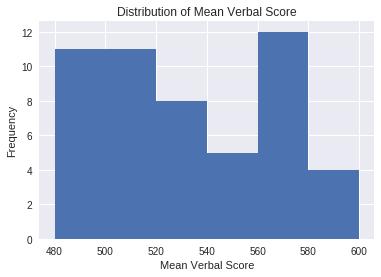

In [18]:
plt.hist(sat_data['Verbal'], bins=range(480, 601, 20))
plt.xlabel('Mean Verbal Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Verbal Score');

##### 17. What is the typical assumption for data distribution?

A typical assumption is that data follows a normal distribution.

##### 18. Does that distribution hold true for our data?

In [19]:
from functools import partial
from scipy.stats import norm

norm_fit_plot = partial(sns.distplot, fit=norm, 
                          kde_kws={"label": "KDE"}, 
                          fit_kws={"label": "normal", "color": "red", "alpha": 0.7, "linestyle": "dashed"})

def make_displot(column, bins, x_label, y_label, title):
    """
    docstring
    """
    ax = norm_fit_plot(sat_data[column], bins=bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    ax.legend(loc='best')
    plt.show()
    return ax

__Note:__  
1. [`functools.partial`](https://docs.python.org/2/library/functools.html#functools.partial) is used for partial function application which “freezes” some portion of a function’s arguments and/or keywords resulting in a new object with a simplified signature.  
2. `seaborn.distplot` [documentation](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn-distplot)  
3. [More](https://en.wikipedia.org/wiki/Kernel_density_estimation) about kernel density estimation (KDE)


#### Rate

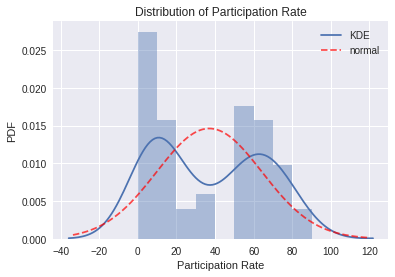

In [20]:
make_displot('Rate', bins=range(0, 101, 10), 
            x_label='Participation Rate', y_label='PDF', 
            title='Distribution of Participation Rate');

The "rate" data is __not__ normally distributed.

#### Math

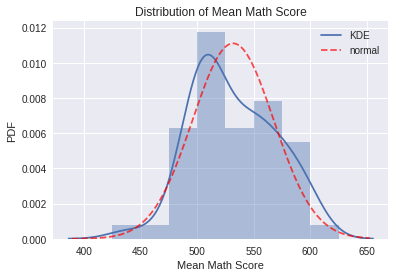

In [21]:
make_displot('Math', bins=range(425, 626, 25), 
            x_label='Mean Math Score', y_label='PDF', 
            title='Distribution of Mean Math Score');

The "Math" data is __not__ normally distributed.

#### Verbal

In [22]:
states_np = np.array(states[:-1])
rate_np = np.array(sat_data['Rate'])
math_np = np.array(sat_data['Math'])
verbal_np = np.array(sat_data['Verbal'])

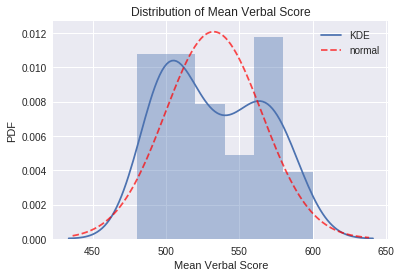

In [23]:
make_displot('Verbal', bins=range(480, 601, 20), 
            x_label='Mean Verbal Score', y_label='PDF', 
            title='Distribution of Mean Verbal Score');

The "Verbal" data is __not__ normally distributed.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

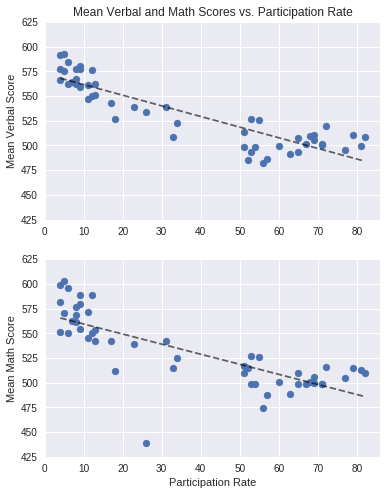

In [24]:
def scatterplot_with_linear_fit(x, y):
    plt.scatter(x, y)
    
    a, b = np.polyfit(x, y, 1)
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = a * x_fit + b
    plt.plot(x_fit, y_fit, linestyle='dashed', color='black', alpha=0.6)

    
y_limit = (425, 625)

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
scatterplot_with_linear_fit(sat_data['Rate'], sat_data['Verbal'])
plt.title('Mean Verbal and Math Scores vs. Participation Rate')
plt.ylabel('Mean Verbal Score')
plt.ylim(y_limit)

plt.subplot(2, 1, 2)
scatterplot_with_linear_fit(sat_data['Rate'], sat_data['Math'])
plt.xlabel('Participation Rate')
plt.ylabel('Mean Math Score')
plt.ylim(y_limit);

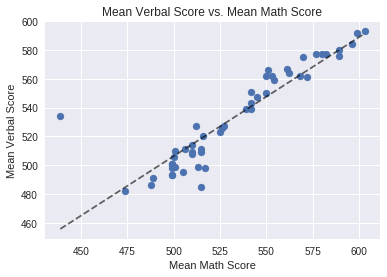

In [25]:
scatterplot_with_linear_fit(sat_data['Math'], sat_data['Verbal'])
plt.title('Mean Verbal Score vs. Mean Math Score')
plt.xlabel('Mean Math Score')
plt.ylabel('Mean Verbal Score');

##### 20. Are there any interesting relationships to note?

In [26]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""

    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

In [27]:
pearson_r(sat_data['Rate'], sat_data['Verbal'])

-0.88812091197857634

In [28]:
pearson_r(sat_data['Rate'], sat_data['Math'])

-0.77341925011761459

In [29]:
pearson_r(sat_data['Math'], sat_data['Verbal'])

0.89990931818110476

In [30]:
pearson_r(rate_np, math_np + verbal_np)

-0.84986028844599015

##### 21. Create box plots for each variable. 

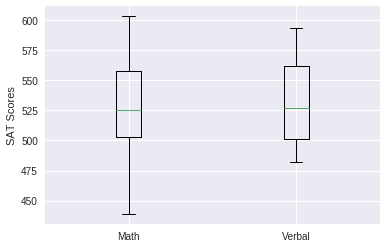

In [31]:
plt.boxplot([sat_data['Math'], sat_data['Verbal']], labels=['Math', 'Verbal'])
plt.ylabel('SAT Scores');

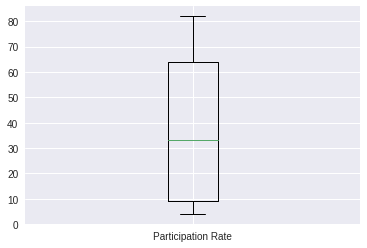

In [32]:
plt.boxplot(sat_data['Rate'], labels=['Participation Rate']);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [33]:
%%HTML
<div class='tableauPlaceholder' id='viz1498797335384' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SAT2001&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='SAT2001&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SAT2001&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1498797335384');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='104px';vizElement.style.maxWidth='2564px';vizElement.style.width='100%';vizElement.style.minHeight='169px';vizElement.style.maxHeight='1719px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>